In [27]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime
import time
from matplotlib.pyplot import figure

In [11]:
# Preview data
youtube_2018_df = pd.read_csv("output/youtube2018.csv")
youtube_2018_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
0,x4TZEVqKIvs,01/01/18,Film Theory: Disney LIED to You! (High School ...,The Film Theorists,1,2017-12-30T20:15:11.000Z,"high school musical|""disney""|""high school musi...",2993235,135820,6207,19539,False,False,False,22,Sat,12/30/2017,20:15:11,2018
1,PjqKPHZJgF0,01/01/18,Lil Wayne - Family Feud feat. Drake (Official ...,Lil Wayne,10,2017-12-29T22:59:01.000Z,"lil wayne|""weezy""|""weezy wednesday""|""wayne car...",3266020,97709,4748,14172,False,False,False,31,Fri,12/29/2017,22:59:01,2018
2,O6BODAJVYc8,01/01/18,"2017, in 7 minutes",Vox,25,2017-12-30T13:00:04.000Z,"vox.com|""vox""|""explain""|""year in review""|""2017...",1565942,69361,13150,18227,False,False,False,12,Sat,12/30/2017,13:00:04,2018
3,mDRifR9HdK8,01/01/18,Best Pet Videos of the Year 2017!,The Pet Collective,15,2017-12-30T14:00:04.000Z,"the pet collective|""pet collective""|""the pet c...",277046,6878,265,389,False,False,False,26,Sat,12/30/2017,14:00:04,2018
4,HqwVFXyCfOI,01/01/18,Best of Hevesh5 (8),Hevesh5,24,2017-12-30T18:00:01.000Z,"domino|""dominos""|""dominoes""|""best of hevesh5""|...",630580,7512,451,562,False,False,False,30,Sat,12/30/2017,18:00:01,2018


In [17]:
# Finding duplicate data
youtube_2018_df['title'].value_counts()

WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                               30
Rooster Teeth Animated Adventures - Millie So Serious                                    29
Why I'm So Scared (being myself and crying too much)                                     29
Sam Smith - Pray (Official Video) ft. Logic                                              29
The ULTIMATE $30,000 Gaming PC Setup                                                     29
                                                                                         ..
Meghan Trainor Left The Four Set Crying After an Intense Run-In with Diddy                1
Whats inside a Mexican Jumping  Bean?                                                     1
PRETTYMUCH Ain’t Scared Of Nick - They’ve Got Simon Cowell | Wild 'N Out | #Wildstyle     1
Westworld Season 2 | Official Super Bowl Ad | HBO                                         1
Conan’s Haitian History Lesson  - CONAN on TBS                                  

In [30]:
#create a dataframe with unique list of videos
youtube_2018 = youtube_2018_df.copy()
#sort by video title and trending_date to find earliest trending date
youtube_2018 = youtube_2018.sort_values(["title", "trending_date"])
youtube_2018 = youtube_2018.drop_duplicates(subset=["title"], keep = "first")
youtube_2018.reset_index(drop=True, inplace=True)
youtube_2018.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,tag_num,publish_dow,publish_date,publish_mhs,trending year
0,l7n58h-Zj3I,01/04/18,#57: AM and SSB explained,Radio Physics and Electronics,28,2017-12-24T19:15:29.000Z,"AM|""SSB""|""amplitude modulation""|""single sideba...",3287,79,3,19,False,False,False,8,Sun,12/24/2017,19:15:29,2018
1,FQp6F0PjfpI,01/06/18,#DisneyParksLIVE: Fantasy In The Sky New Years...,Disney Parks,24,2018-01-01T05:11:37.000Z,"Fantasy In The Sky New Years Eve Fireworks|""Di...",130416,1812,30,110,False,False,False,17,Mon,01/01/2018,05:11:37,2018
2,HhGJBBPVpqQ,02/08/18,#DisneyParksLIVE: Super Bowl Celebration | Wal...,Disney Parks,19,2018-02-05T20:34:54.000Z,[none],33968,352,22,33,False,False,False,1,Mon,02/05/2018,20:34:54,2018
3,k-Uw58mxLV4,01/12/18,#EDGYTOKEI,ekaggrat singh kalsi,28,2018-01-07T04:44:42.000Z,[none],4810,22,2,3,False,False,False,1,Sun,01/07/2018,04:44:42,2018
4,ijVLdH5dt-c,02/03/18,#GuacWorld :60 | 2018 Big Game Commercial | Av...,Avocados From Mexico,24,2018-01-31T14:30:24.000Z,"Avocados from Mexico|""food""|""avocado""|""avocado...",21278,54,5,4,False,False,False,9,Wed,01/31/2018,14:30:24,2018


In [31]:
# describe data
youtube_2018.describe()

,category_id,views,likes,dislikes,comment_count,tag_num,trending year
count,4511.000000,4.511000e+03,4.511000e+03,4511.000000,4511.000000,4511.000000,4511.0
mean,20.432720,9.087754e+05,3.859628e+04,1605.329860,4937.196409,20.148082,2018.0
std,7.252209,2.211337e+06,1.227994e+05,11935.942277,22616.676662,12.050753,0.0
min,1.000000,5.490000e+02,0.000000e+00,0.000000,0.000000,1.000000,2018.0
25%,17.000000,1.270010e+05,2.722000e+03,103.000000,350.500000,10.000000,2018.0
50%,24.000000,3.490330e+05,9.906000e+03,304.000000,1112.000000,20.000000,2018.0
75%,25.000000,8.941890e+05,2.986050e+04,897.500000,3303.000000,29.000000,2018.0
max,43.000000,4.843165e+07,3.880071e+06,629120.000000,733373.000000,69.000000,2018.0


In [45]:
# investigate videos with no likes
vid_no_likes = youtube_2018.loc[youtube_2018['likes']==0]
vid_no_likes['channel_title'].value_counts()

Michelob ULTRA              2
MassMutual                  2
Tentmaker Pictures          2
Dancing On Ice              2
Alpha Entertainment         2
TV One                      1
DJI                         1
Famous Celebrities Snaps    1
PK Inventor                 1
TDAmeritrade                1
Caravan Carolyn             1
UMF TV                      1
Coachella                   1
Paris Hilton                1
cheeseandjamsandwich        1
Kylie Jenner                1
Slooh                       1
Tati                        1
Kim Kardashian West         1
Name: channel_title, dtype: int64

In [33]:
# Top 20 channels
youtube_2018["channel_title"].value_counts().head(20)

ESPN                                      69
TheEllenShow                              54
Jimmy Kimmel Live                         52
The Tonight Show Starring Jimmy Fallon    50
The Late Show with Stephen Colbert        43
CNN                                       42
NBA                                       40
Netflix                                   40
BuzzFeedVideo                             33
The Late Late Show with James Corden      32
INSIDER                                   30
Vox                                       25
Saturday Night Live                       24
Tasty                                     24
WWE                                       23
Refinery29                                22
The King of Random                        21
WIRED                                     21
SciShow                                   21
NFL                                       21
Name: channel_title, dtype: int64

In [34]:
#Using median as measure of central tendency due to distribution of data
print(f"Median Views: {int(youtube_2018['views'].median())}")
print(f"Median Likes: {int(youtube_2018['likes'].median())}")
print(f"Median Dislikes: {int(youtube_2018['dislikes'].median())}")
print(f"Median Comment Count: {int(youtube_2018['comment_count'].median())}")

Median Views: 349033
Median Likes: 9906
Median Dislikes: 304
Median Comment Count: 1112


In [35]:
dow_df = pd.DataFrame(youtube_2018['publish_dow'].value_counts())
dow_df = dow_df.rename(columns={"publish_dow": "Count"})
dow_df

,Count
Fri,773
Thu,765
Wed,741
Tue,707
Mon,699
Sun,420
Sat,406


In [53]:
chi_dow_df = dow_df.copy()
chi_dow_df['expected'] = 0.14
chi_dow_df['observed']=''

for index, row in chi_dow_df.iterrows():
    count = chi_dow_df['Count']
    chi_dow_df['observed'] = count/4511
    
del chi_dow_df['Count']

chi_dow_df

,expected,observed
Fri,0.14,0.171359
Thu,0.14,0.169585
Wed,0.14,0.164265
Tue,0.14,0.156728
Mon,0.14,0.154955
Sun,0.14,0.093106
Sat,0.14,0.090002


In [54]:
# The degree of freedom is 7-1 = 6
critical_value = stats.chi2.ppf(q = 0.95, df = 6)
#critical_value is 12.591587243743977

# Run the chi square test 
stats.chisquare(chi_dow_df['observed'], chi_dow_df['expected'])
# We conclude that the results are not statistically significant.

Power_divergenceResult(statistic=0.054641363764908704, pvalue=0.999996670105115)

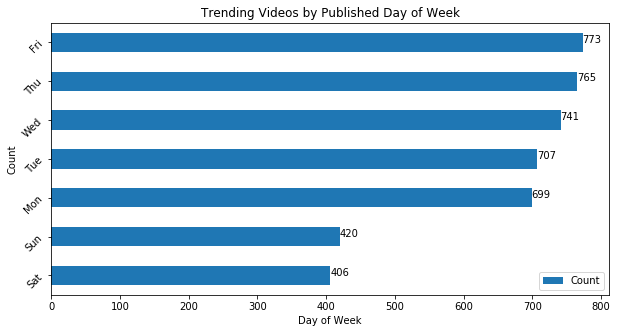

In [76]:
dow_df.plot.barh(rot=45)
plt.title("Trending Videos by Published Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.gca().invert_yaxis()

y= dow_df["Count"]
for index, value in enumerate(y):
    plt.text(value, index, str(value))

fig = plt.gcf()
fig.set_size_inches(10,5)

plt.savefig("DOWchart.png")

In [56]:
# Total the counts of tags
tag_count_df = pd.DataFrame(youtube_2018['tag_num'].value_counts().head(10))
tag_count_df = tag_count_df.rename(columns={"tag_num": "Count"})
tag_count_df

,Count
1,234
10,159
30,142
7,140
24,137
4,127
25,127
27,127
15,126
8,122


In [60]:
chi_tag_count_df = tag_count_df.copy()
chi_tag_count_df['expected'] = 0.1
chi_tag_count_df['observed']=''

for index, row in chi_tag_count_df.iterrows():
    count = chi_tag_count_df['Count']
    chi_tag_count_df['observed'] = count/1441
    
del chi_tag_count_df['Count']

chi_tag_count_df

,expected,observed
1,0.1,0.162387
10,0.1,0.110340
30,0.1,0.098543
7,0.1,0.097155
24,0.1,0.095073
4,0.1,0.088133
25,0.1,0.088133
27,0.1,0.088133
15,0.1,0.087439
8,0.1,0.084663


In [59]:
# The degree of freedom is 10-1 = 9
critical_value = stats.chi2.ppf(q = 0.95, df = 9)
#critical_value is 16.92

# Run the chi square test 
stats.chisquare(chi_tag_count_df['observed'], chi_tag_count_df['expected'])
# We conclude that the results are not statistically significant.

Power_divergenceResult(statistic=0.048490210119909595, pvalue=0.9999999989922811)

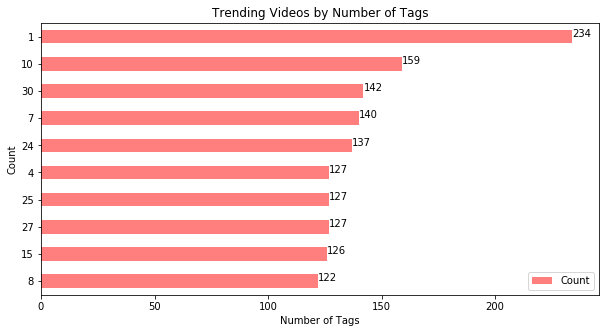

In [77]:
tag_count_df.plot.barh(color='r', alpha=0.5, rot=0)
plt.title("Trending Videos by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Count")
plt.gca().invert_yaxis()

y= tag_count_df["Count"]
for index, value in enumerate(y):
    plt.text(value, index, str(value))

fig = plt.gcf()
fig.set_size_inches(10,5)

plt.savefig("NumOfTagsChart.png")

In [61]:
# Get total count per catefory and create DF
top5_categories = pd.DataFrame(youtube_2018['category_id'].value_counts())

top5_categories["id"] = ''
for index, row in top5_categories.iterrows():      
    top5_categories.loc[index, "id"] = index

top5_categories = top5_categories.sort_values(by=['id'])

In [62]:
# import category list from YouTube API as DF
category_list = pd.read_csv("output/YouTube_Categories.csv")
del category_list["Unnamed: 0"]
category_list = category_list.sort_values(by=['id'])

In [64]:
# merge df into one df
merged_category = pd.merge(top5_categories, category_list, on="id", how="left")
sorted_category = merged_category.sort_values(by=['category_id'], ascending=False)
sorted_category.rename(columns = {'category_id':'category_counts'}, inplace = True)
sorted_category = sorted_category[["id", "category","category_counts"]]
sorted_category.head(5)

,id,category,category_counts
9,24,Entertainment,1142
2,10,Music,544
11,26,Howto & Style,419
8,23,Comedy,363
7,22,People & Blogs,356
4,17,Sports,335
10,25,News & Politics,335
13,28,Science & Technology,282
0,1,Film & Animation,234
12,27,Education,192


In [72]:
chi_sorted_category = sorted_category.copy()
chi_sorted_category['expected'] = 0.0625
chi_sorted_category['observed']=''

chi_sorted_category.set_index('category', inplace=True)
chi_sorted_category

for index, row in chi_sorted_category.iterrows():
    count = chi_sorted_category['category_counts']
    chi_sorted_category['observed'] = count/4511
    
del chi_sorted_category['category_counts']
del chi_sorted_category['id']

chi_sorted_category

,expected,observed
category,,
Entertainment,0.0625,0.253159
Music,0.0625,0.120594
Howto & Style,0.0625,0.092884
Comedy,0.0625,0.080470
People & Blogs,0.0625,0.078918
Sports,0.0625,0.074263
News & Politics,0.0625,0.074263
Science & Technology,0.0625,0.062514
Film & Animation,0.0625,0.051873


In [75]:
# The degree of freedom is 16-1 = 15
critical_value = stats.chi2.ppf(q = 0.95, df = 15)
#critical_value is 25

# Run the chi square test 
stats.chisquare(chi_sorted_category['observed'], chi_sorted_category['expected'])
# We conclude that the results are not statistically significant.

Power_divergenceResult(statistic=0.9295457528607749, pvalue=0.9999998488059731)

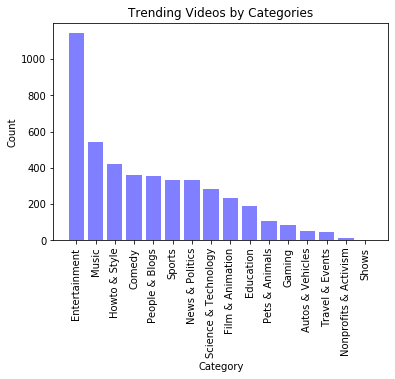

In [78]:
x = sorted_category["category"]
y = sorted_category["category_counts"]

tick_locations = [value for value in x]

plt.bar(x, y, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, sorted_category["category"], rotation="vertical")

plt.title("Trending Videos by Categories")
plt.xlabel("Category")
plt.ylabel("Count")

plt.savefig("CategoriesChart.png")